In [3]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
l_b, kappa, l_k = sy.symbols("l_b, \\kappa, l_k")

In [5]:
l_K_exp = l_b * (
        (2 * kappa + sy.exp(-2 * kappa) - 1)
        /  # -------------------------------
        (1 - sy.exp(-2 * kappa) * (2 * kappa + 1))
)

l_K_exp

l_b*(2*\kappa - 1 + exp(-2*\kappa))/(-(2*\kappa + 1)*exp(-2*\kappa) + 1)

In [6]:
sy.solveset(l_K_exp, kappa)

# bare_kuhn_length(kappa, l_k)

Complement(ConditionSet(\kappa, Eq(2*\kappa*exp(2*\kappa) - exp(2*\kappa) + 1, 0), Complexes), ConditionSet(\kappa, Eq(-2*\kappa + exp(2*\kappa) - 1, 0), Complexes))

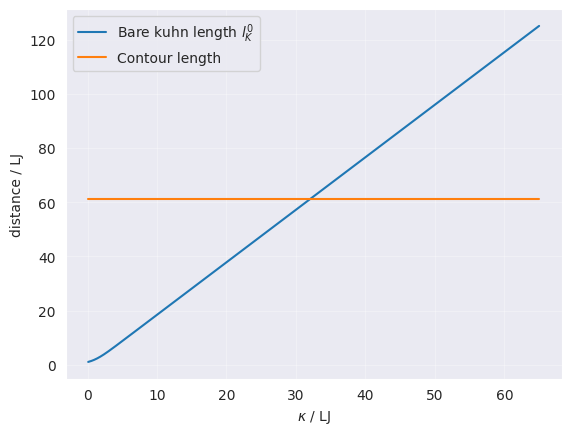

In [7]:
def bare_kuhn_length(kappa, l_b):
    return l_b * (
            (2 * kappa + np.exp(-2 * kappa) - 1)
            /  # -------------------------------
            (1 - np.exp(-2 * kappa) * (2 * kappa + 1))
    )


N_bonds = 63
l_b = .97
L = l_b*N_bonds
xs = np.linspace(0.1, 65, 1000)
plt.plot(xs, bare_kuhn_length(xs, l_b), label="Bare kuhn length $l_K^0$")
plt.plot(xs, np.repeat(l_b*N_bonds, len(xs)), label="Contour length")
plt.xlabel("$\\kappa$ / LJ")
plt.ylabel("distance / LJ")
plt.grid(True, alpha=0.3)
plt.legend()

In [8]:
kappas_for_exp = np.linspace(1, 60, 8)
kappas_for_exp

array([ 1.        ,  9.42857143, 17.85714286, 26.28571429, 34.71428571,
       43.14285714, 51.57142857, 60.        ])

In [9]:
l_K_desired = 368 / 220
l_K_desired

1.6727272727272726

In [10]:
l_K_desired * L

102.22036363636363

In [11]:
import scipy.optimize
f = lambda k: bare_kuhn_length(k, l_b) - l_K_desired*L
scipy.optimize.root(f, x0 = 60)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 5.319e+01]
    nfev: 4
    fjac: [[-1.000e+00]]
       r: [-1.940e+00]
     qtf: [-6.491e-08]

In [12]:
dk = 4
k_0 = 49.2
[k_0+i*dk for i in range(3)]

[49.2, 53.2, 57.2]

In [19]:
def find_desired_kappa(l_K_desired, L=220, l_b=.97, kappa_guess=100):
    f = lambda k: bare_kuhn_length(k, l_b) - l_K_desired
    print(f"Desired l_K = {l_K_desired} = {l_K_desired / L}L")
    print("Calculated kappa:")
    print(scipy.optimize.root(f, x0 = kappa_guess))
    print("--------------")

In [20]:
find_desired_kappa(138, kappa_guess=50)
find_desired_kappa(368, kappa_guess=100)

Desired l_K = 138 = 0.6272727272727273L
Calculated kappa:
 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 7.163e+01]
    nfev: 4
    fjac: [[-1.000e+00]]
       r: [-1.940e+00]
     qtf: [-9.152e-11]
--------------
Desired l_K = 368 = 1.6727272727272726L
Calculated kappa:
 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 1.902e+02]
    nfev: 4
    fjac: [[-1.000e+00]]
       r: [-1.940e+00]
     qtf: [-3.816e-10]
--------------


In [21]:
71.63-4

67.63

In [23]:
190.2-2*4

182.2